<a href="https://colab.research.google.com/github/DaeSeokSong/image-processing/blob/feature%2FUnet-scar/Image_segmentation_Scar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reference

* [K-Means](https://blog.naver.com/PostView.nhn?isHttpsRedirect=true&blogId=samsjang&logNo=221017639342&categoryNo=0&parentCategoryNo=0&viewDate=&currentPage=1&postListTopCurrentPage=1&from=postView)

---

## Dataset
* [Wound dataset](https://github.com/uwm-bigdata/wound-segmentation)

---

# Set development enviroment

## Import

### Library

In [1]:
# Image processing
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

from google.colab.patches import cv2_imshow
from google.colab import output

# ETC
import os
import time

### Google drive mount

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
%cd /content/gdrive/MyDrive/Models/GAN_Scar
!ls -al

/content/gdrive/MyDrive/Models/GAN_Scar
total 144
drwx------ 2 root root  4096 Aug 16 08:53  Dataset
-rw------- 1 root root  6325 Sep  1 08:52  Image_segmentation-Scar.ipynb
drwx------ 2 root root  4096 Aug 17 05:49  Log
-rw------- 1 root root 34986 Aug 29 15:15  Processor_PerformanceTester-Scar.ipynb
drwx------ 2 root root  4096 Aug 16 08:39  Raw_Dataset
-rw------- 1 root root 16647 Aug 29 15:29  RawDataset_Processor-Scar.ipynb
drwx------ 2 root root  4096 Aug 23 14:47  result
-rw------- 1 root root 39995 Aug 15 11:40 'UNet architecture.PNG'
-rw------- 1 root root 30877 Sep  1 08:53  Unet-Scar.ipynb


# Image segmentation

## Global variable

In [4]:
MODEL_PATH = "/content/gdrive/MyDrive/Models/GAN_Scar"

TRAIN_SET_PATH = "/Dataset/train"
TEST_SET_PATH = "/Dataset/test"

IMAGES_PATH = '/images'
LABELS_PATH = '/labels'

NORM_INPUT_SIZE = 480

## Function

In [15]:
def imshow_waitkey_enter(image):
    cv2_imshow(image)

    time.sleep(0.5)
    input("Please press the Enter key to proceed\n")
    output.clear()

    pass

def elbow(x):
    sse = []

    for i in range(1, 11):
        km = KMeans(n_clusters=i, init='k-means++', random_state=0)
        km.fit(x)
        sse.append(km.inertia_)

    print("sse = ", sse)
    plt.plot(range(1, 11), sse, marker='o')
    plt.xlabel('Cluster number')
    plt.ylabel('SSE')
    plt.show()

    time.sleep(0.5)
    input("Please press the Enter key to proceed\n")
    output.clear()

## Run

In [10]:
# Set load image dir path
image_path = MODEL_PATH + TRAIN_SET_PATH

# Load images
lst_data = os.listdir(image_path)

lst_scar = [f for f in lst_data if f.startswith('scar')]
lst_label = [f for f in lst_data if f.startswith('label')]

lst_scar.sort()
lst_label.sort()

train_images = []
for f in lst_scar: 
    train_images.append(cv2.imread(os.path.join(image_path, f), 
                                   cv2.IMREAD_GRAYSCALE))

label_images = []
for f in lst_label: 
    label_images.append(cv2.imread(os.path.join(image_path, f), 
                                   cv2.IMREAD_GRAYSCALE))

Dataset = [(x, label_images[idx]) for idx, x in enumerate(train_images)]

(480, 480)
sse =  [95440399.36874977, 23988731.79429961, 17531852.48564903, 14352958.03631208, 12384650.411573706, 10989775.90104811, 9910719.33784465, 8973745.859393995, 8184520.753064152, 7427807.475543152]


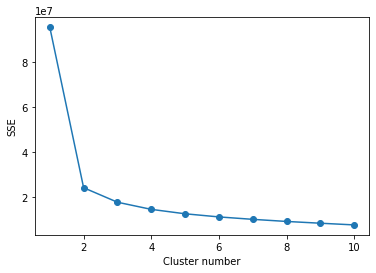

KeyboardInterrupt: ignored

In [16]:
# Preprocess image
for image, label in Dataset:
    # Resize image
    imageW = image.shape[0]
    imageH = image.shape[1]

    resizeRatioW = imageW / NORM_INPUT_SIZE
    resizeRatioH = imageH / NORM_INPUT_SIZE

    image = cv2.resize(image, 
                       (int(imageW / resizeRatioW), int(imageH / resizeRatioH)), 
                       interpolation=cv2.INTER_CUBIC
                       )
    label = cv2.resize(label, 
                       (int(imageW / resizeRatioW), int(imageH / resizeRatioH)), 
                       interpolation=cv2.INTER_CUBIC
                       )

    # Save original image
    origin_image = image.copy()

    """
    # Get HSV image
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    hue_image, sat_image, val_image = cv2.split(hsv_image)

    # Get grayscale image
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Threshold
    _, ths_image = cv2.threshold(gray_image, 
                                 200, 
                                 255, 
                                 cv2.THRESH_OTSU + cv2.THRESH_BINARY_INV)
    """

    # Optimizing k parameters with Elbow method
    print(image.shape)
    elbow(image)

    """
    # Clustering use K-means
    cluster_data = val_image.reshape((-1, 3)).astype(np.float32)
    k = 4
    # 최대 10번 반복하고 1픽셀 이하로 움직이면 종료
    criteria = (cv2.TERM_CRITERIA_EPS|cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    ret, c_label, center = cv2.kmeans(cluster_data, 
                                    k, 
                                    None, 
                                    criteria,
                                    10,
                                    cv2.KMEANS_RANDOM_CENTERS)
    
    center = np.uint8(center)
    dst = center[c_label.flatten()]
    dst = dst.reshape((val_image.shape))

    cv2_imshow(image)
    cv2_imshow(label)
    imshow_waitkey_enter(dst)
    """